In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../data')
sys.path.append('../Librerias')

import dataset as ds
import utils
import caract as dc


In [2]:
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/"
fname = "datosconsu_021023_bajos.mat"
cutoff = [8/1000, 11/1000]

set =  ds.MatFileToDataFrame(fpath, fname)
df = set.get_dataframe(cutoff)
df.tail()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform
599995,5.210999,-0.843661,0.008744,0.008744-0.033806j
599996,5.063692,-0.990968,0.008370,0.008370-0.038726j
599997,5.012726,-1.041933,0.007971,0.007971-0.026995j
599998,4.868050,-1.186610,0.007550,0.007550-0.033919j
599999,4.806563,-1.248097,0.007108,0.007108+0.008805j


In [3]:
defects = dc.CaractDefect(df)


In [4]:
defects.get_hilbert()[0]

,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,-0.071002-0.004745j,0.071160,-3.074865,-0.059617
1,-0.060395-0.067391j,0.090494,-2.301505,-0.032723
2,-0.049986-0.073204j,0.088642,-2.169909,-0.007483
3,-0.039782-0.095259j,0.103232,-1.966397,0.014630
4,-0.029789-0.098247j,0.102663,-1.865189,0.032492
...,...,...,...,...
599995,0.008744-0.033806j,0.034918,35655.758924,0.564292
599996,0.008370-0.038726j,0.039621,35655.718672,0.916939
599997,0.007971-0.026995j,0.028148,35655.792953,1.313134
599998,0.007550-0.033919j,0.034749,35655.724856,1.739100


In [5]:

len(defects.get_peaks())

16845

In [6]:
defects.get_minAmp()

,Min Amp
0,25027
1,25028
2,27472
3,27473
4,35643
...,...
114,474553
115,474554
116,502386
117,564212


In [7]:
min = defects.get_minAmp()['Min Amp'].values
peaks = defects.get_peaks()['Peaks'].values
intersection = np.intersect1d(min, peaks)
intersection


array([ 25028,  27473,  35644,  37221,  48357,  57435,  61736,  79002,
        82320,  84358,  97860,  99898, 101097, 131898, 165605, 166248,
       183095, 187691, 203516, 219496, 235523, 275618, 277922, 301738,
       322055, 322436, 339151, 393920, 395410, 396731, 412955, 413372,
       430275, 444419, 453976, 456080, 456878, 457201, 457404, 470769,
       474554, 502386, 564213])

In [8]:
display(defects.get_defectos()[1][0])



,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
24528,6.560437,0.505777,0.005911,0.005911+0.001880j,0.006203,1527.122019,-0.002188
24529,6.542023,0.487363,0.005803,0.005803+0.002217j,0.006212,1527.178990,-0.002300
24530,6.474617,0.419957,0.005676,0.005676+0.002549j,0.006222,1527.236175,-0.002410
24531,6.455875,0.401215,0.005529,0.005529+0.002871j,0.006230,1527.292939,-0.002516
24532,6.417404,0.362744,0.005363,0.005363+0.003185j,0.006238,1527.349906,-0.002619
...,...,...,...,...,...,...,...
25523,5.241249,-0.813410,-0.007098,-0.007098-0.001215j,0.007201,1574.107426,-0.002672
25524,5.226782,-0.827878,-0.006989,-0.006989-0.001609j,0.007172,1574.164232,-0.002488
25525,5.258348,-0.796312,-0.006857,-0.006857-0.001998j,0.007142,1574.221508,-0.002299
25526,5.265910,-0.788750,-0.006702,-0.006702-0.002377j,0.007111,1574.278701,-0.002104


In [9]:
defects.get_defectos()[1]

[       Original Signal  Signal - Mean  Filtered Signal   Hilbert Transform  \
 24528         6.560437       0.505777         0.005911  0.005911+0.001880j   
 24529         6.542023       0.487363         0.005803  0.005803+0.002217j   
 24530         6.474617       0.419957         0.005676  0.005676+0.002549j   
 24531         6.455875       0.401215         0.005529  0.005529+0.002871j   
 24532         6.417404       0.362744         0.005363  0.005363+0.003185j   
 ...                ...            ...              ...                 ...   
 25523         5.241249      -0.813410        -0.007098 -0.007098-0.001215j   
 25524         5.226782      -0.827878        -0.006989 -0.006989-0.001609j   
 25525         5.258348      -0.796312        -0.006857 -0.006857-0.001998j   
 25526         5.265910      -0.788750        -0.006702 -0.006702-0.002377j   
 25527         5.279063      -0.775597        -0.006525 -0.006525-0.002747j   
 
        Amplitude  Instantaneous Phase  Gradient P

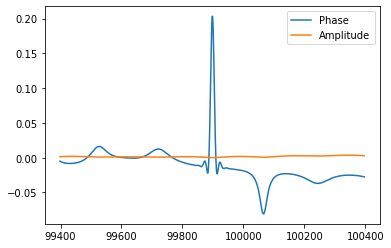

In [10]:
x = defects.get_defectos()[1][11]

plt.plot(x['Gradient Phase'], label = 'Phase')
plt.plot(x['Amplitude'], label = 'Amplitude')
plt.legend()
plt.show()

In [11]:
defects.get_tau()

ValueError: attempt to get argmin of an empty sequence